In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
#from keras.models import load_model
#x=load_model('Sktch_Model_Without_Dropout.h5')

In [0]:
import tensorflow
import keras
from tensorflow.python.keras.layers import Dense,Flatten,Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import Model
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.optimizers import Adam

In [6]:
vgg=VGG16(include_top=True,weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 7s 0us/step


In [7]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
#-------------------------------------------------------GETTING THE LAYER FROM WHICH WE HAVE TO EDIT THE MODEL
incomp_model=vgg.get_layer('fc2')

In [0]:
#-------------------------------------------------------CREATING THE TEMPORARY MODEL TILL THE SECOND LAST LAYER
temp_model=Model(inputs=vgg.input,outputs=incomp_model.output)

In [10]:
temp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
# --------------------------------------------------------------------------NEW MODEL 
#temp_model.add(Dense(92,activation='softmax'))  Model has no attribute add
req_model=Sequential()
req_model.add(temp_model)
req_model.add(Dropout(0.5))
req_model.add(Dense(125,activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
req_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 4096)              134260544 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 125)               512125    
Total params: 134,772,669
Trainable params: 134,772,669
Non-trainable params: 0
_________________________________________________________________


In [13]:
#-----------------------------------------------------------CHECKING FOR TRAINABLE LAYERS IN THE VGG16
for layer in temp_model.layers:
  print("{0}: /t{1}".format(layer.trainable,layer))

True: /t<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f9230741f60>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f923075e080>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f928e6b4ba8>
True: /t<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f92226f1b70>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f923075e748>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9222713c18>
True: /t<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f922265ef28>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f92226c6940>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9222677e48>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9222631438>
True: /t<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9222643f60>
True: /t<tensorflow.python.keras.layers.c

In [0]:
temp_model.trainable=False

In [0]:
for layer in temp_model.layers:
  layer.trainable=False

In [16]:
#------------------------------------------------------------CHANGING THE TRAINABLE LAYERS TO FALSE
for layer in temp_model.layers:
  print("{0}: /t{1}".format(layer.trainable,layer))

False: /t<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f9230741f60>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f923075e080>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f928e6b4ba8>
False: /t<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f92226f1b70>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f923075e748>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9222713c18>
False: /t<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f922265ef28>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f92226c6940>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9222677e48>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9222631438>
False: /t<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9222643f60>
False: /t<tensorflow.python.ke

In [17]:
for layer in req_model.layers:
  print(layer.trainable,layer)

False <tensorflow.python.keras.engine.training.Model object at 0x7f9221f072b0>
True <tensorflow.python.keras.layers.core.Dropout object at 0x7f9221f32630>
True <tensorflow.python.keras.layers.core.Dense object at 0x7f9230741e80>


In [0]:
#-----------------------------------------------------------------------COMPILING MODEL
req_model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['categorical_accuracy'])

## **Loading the sketch dataset in datagenerator**

In [0]:
#---------------------------------------------------------DATA GENERATOR TO UPLOAD IMAGES TO THE MODEL
#HORIZONTAL FLIP-TAKES RANDOM IMAGES AND FLIPS IT, RESCALE SINCE THE VGG16 MODEL REQUIRES THE INPUT OF PIXEL BETWEEN 0 AND 1
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

In [0]:
train_gen=ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True)
test_gen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_gen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [21]:
#-------------------------------------------------------UPLOADING THE TRAINING DATA IN DATA-GENERATOR
#IT AUTOMATICALLY TAKES IN DIRECTORY NAMES AS CLASS NAMES
generator_train=train_gen.flow_from_directory(directory='/content/gdrive/My Drive/Sketchy_Dataset/Sketches',target_size=(224,224),
                                              batch_size=256,shuffle=True)

Found 25000 images belonging to 125 classes.


In [0]:
#import os
#testing_path_train=os.path.join('/content/gdrive/My Drive/Splitted_SBIR_Data/Sketches/Training',generator_train.filenames[0])

In [0]:
#img=cv2.imread()

In [0]:
#-------------------------------------------------------UPLOADING THE VALIDATION DATA IN DATA-GENERATOR
#generator_val=val_gen.flow_from_directory(directory='/content/gdrive/My Drive/Splitted_SBIR_Data/Sketches/Validation',target_size=(224,224),
#                                        batch_size=256,shuffle=True)

Found 736 images belonging to 92 classes.


### **Training**

In [22]:
#-----------------------------------------TRAINING THE MODEL
trainer=req_model.fit_generator(generator=generator_train,epochs=60,steps_per_epoch=98)#,validation_data=generator_val)

Instructions for updating:
Use tf.cast instead.
Epoch 1/60
98/98 [==============================] - 6939s 71s/step - loss: 6.2101 - categorical_accuracy: 0.0088
Epoch 2/60
98/98 [==============================] - 126s 1s/step - loss: 5.7453 - categorical_accuracy: 0.0142
Epoch 3/60
98/98 [==============================] - 125s 1s/step - loss: 5.4468 - categorical_accuracy: 0.0185
Epoch 4/60
98/98 [==============================] - 125s 1s/step - loss: 5.2383 - categorical_accuracy: 0.0256
Epoch 5/60
98/98 [==============================] - 125s 1s/step - loss: 5.0521 - categorical_accuracy: 0.0326
Epoch 6/60
98/98 [==============================] - 125s 1s/step - loss: 4.8875 - categorical_accuracy: 0.0414
Epoch 7/60
98/98 [==============================] - 125s 1s/step - loss: 4.7293 - categorical_accuracy: 0.0530
Epoch 8/60
98/98 [==============================] - 125s 1s/step - loss: 4.5856 - categorical_accuracy: 0.0636
Epoch 9/60
98/98 [==============================] - 125s 1s/st

In [23]:
trainer.history.keys()

dict_keys(['loss', 'categorical_accuracy'])

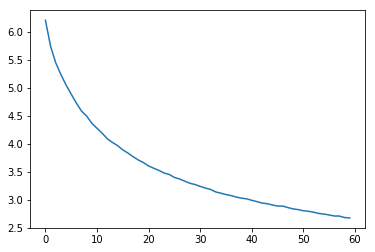

In [24]:
import matplotlib.pyplot as plt
#plt.plot(trainer.history['categorical_accuracy'])
plt.plot(trainer.history['loss'])

## **Fine Tuning with whole dataset **

In [25]:
for layer in temp_model.layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [0]:
temp_model.trainable=True

In [0]:
#for layer in temp_model.layers:
  #print(layer.trainable)

In [0]:
for layer in temp_model.layers:
  layer.trainable=True

In [29]:
for layer in req_model.layers:
  print(layer.trainable,layer)

True <tensorflow.python.keras.engine.training.Model object at 0x7f9221f072b0>
True <tensorflow.python.keras.layers.core.Dropout object at 0x7f9221f32630>
True <tensorflow.python.keras.layers.core.Dense object at 0x7f9230741e80>


In [30]:
print(req_model.trainable)
print(temp_model.trainable)

True
True


In [0]:
req_model.compile(optimizer=Adam(lr=1e-6),loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [0]:
train_gen_=ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True)
test_gen_=ImageDataGenerator(preprocessing_function=preprocess_input)
val_gen_=ImageDataGenerator(preprocessing_function=preprocess_input)

In [33]:
training_data_gen=train_gen_.flow_from_directory(directory='/content/gdrive/My Drive/Sketchy_Dataset/Sketches',target_size=(224,224),
                                               batch_size=64,shuffle=True)

Found 25000 images belonging to 125 classes.


In [34]:
validation_data_gen=val_gen_.flow_from_directory(directory='/content/gdrive/My Drive/Sketchy_Dataset/Val_skt',target_size=(224,224),
                                               batch_size=64,shuffle=True)

Found 6250 images belonging to 125 classes.


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint('/content/gdrive/My Drive/Best_Model/Sketch/sktch.h5',verbose=1,monitor='val_accuracy',save_best_only=True,mode='auto',period=1)
trainer=req_model.fit_generator(generator=training_data_gen,epochs=50,steps_per_epoch=92,validation_data=validation_data_gen,callbacks=[checkpoint])

Epoch 1/50
391/391 [==============================] - 2924s 7s/step - loss: 2.2882 - categorical_accuracy: 0.4266 - val_loss: 2.0303 - val_categorical_accuracy: 0.4971
Epoch 2/50
391/391 [==============================] - 399s 1s/step - loss: 1.9819 - categorical_accuracy: 0.4891 - val_loss: 1.8590 - val_categorical_accuracy: 0.5317
Epoch 3/50
391/391 [==============================] - 401s 1s/step - loss: 1.7666 - categorical_accuracy: 0.5379 - val_loss: 1.7327 - val_categorical_accuracy: 0.5627
Epoch 4/50
391/391 [==============================] - 400s 1s/step - loss: 1.6033 - categorical_accuracy: 0.5738 - val_loss: 1.6466 - val_categorical_accuracy: 0.5838
Epoch 5/50
391/391 [==============================] - 400s 1s/step - loss: 1.4662 - categorical_accuracy: 0.6039 - val_loss: 1.5638 - val_categorical_accuracy: 0.6018
Epoch 6/50
391/391 [==============================] - 401s 1s/step - loss: 1.3521 - categorical_accuracy: 0.6336 - val_loss: 1.5076 - val_categorical_accuracy: 0.61

In [0]:
trainer.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

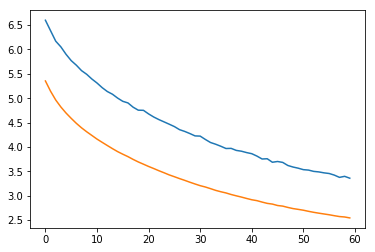

In [0]:
plt.plot(trainer.history['loss'])
plt.plot(trainer.history['val_loss'])

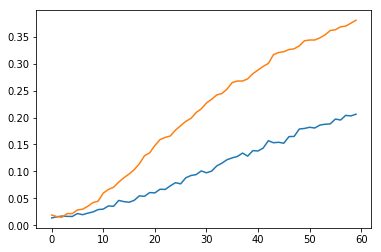

In [0]:
plt.plot(trainer.history['categorical_accuracy'])
plt.plot(trainer.history['val_categorical_accuracy'])

In [0]:
req_layer=req_model.get_layer('model')

In [0]:
feature_model_s=Model(inputs=temp_model.input,outputs=req_layer.output)

In [0]:
feature_model_s.get_weights()

[array([[[[ 4.29388314e-01,  1.17267758e-01,  3.39524224e-02, ...,
           -1.32253617e-01, -5.32888472e-02,  7.56094325e-03],
          [ 5.50297976e-01,  2.08714567e-02,  9.87711400e-02, ...,
           -8.48349184e-02, -5.10816537e-02,  3.74761857e-02],
          [ 4.79933202e-01, -1.72702551e-01,  3.74983177e-02, ...,
           -1.27150893e-01, -5.02426662e-02,  3.48773189e-02]],
 
         [[ 3.73380244e-01,  1.62023157e-01,  1.64555141e-03, ...,
           -1.48112610e-01, -2.35240698e-01, -6.30484670e-02],
          [ 4.39987421e-01,  4.73018363e-02,  5.13192564e-02, ...,
           -9.87703502e-02, -2.96137422e-01, -7.04499111e-02],
          [ 4.08460200e-01, -1.70414120e-01, -5.02543757e-03, ...,
           -1.22288629e-01, -2.76392877e-01, -3.90947647e-02]],
 
         [[-6.14487641e-02,  1.35716617e-01, -1.15726702e-01, ...,
           -1.40136465e-01, -3.77599835e-01, -3.00506532e-01],
          [-8.14765021e-02,  4.18759324e-02, -1.01793483e-01, ...,
           -9.429

In [0]:
feature_model_s.save('/content/gdrive/My Drive/Best_Model/Sketch/Sktch_feature_generator.h5')